<div align='center'>
    <a href="https://ibb.co/xsL9MKM"><img src="https://i.ibb.co/3sd6050/red-wine-blends-FT-MAG1116-2000-4f3c3e91bcd646ea8a21f2152746ef53.jpg" alt="red-wine-blends-FT-MAG1116-2000-4f3c3e91bcd646ea8a21f2152746ef53" border="0"></a>
</div>

# Project Content <a id=0></a>

* 1. [Introduction](#1)
    * 1.1 [About Dataset](#1.1)
    * 1.2 [How is the quality of a Wine Checked and Determined?](#1.2)
* 2. [First Steps](#2)
    * 2.1 [Loading Necessary Libraryes](#2.1)
    * 2.2 [Loading The Dataset](#2.2)
    * 2.3 [Understading The Variables](#2.3)
* 3. [Exploring Dataset](#3)
    * 3.1 [Initial Assessment](#3.1)
        * 3.1.1 [Analysis Output](#3.1.1)
    * 3.2 [Statistical Summary](#3.2)
        * 3.2.1 [Analysis Output](#3.2.1)
* 4. [Exploratory Data Analysis](#4)
    * 4.1 [Viualizing Relationship Between Target And Other Variables](#4.1)
    * 4.2 [Variable's Distribution](#4.2)
        * 4.2.1 [Analysis Output](#4.2.1)
    * 4.3 [Correlation](#4.3)
        * 4.3.1 [Analysis Output](#4.3.1)
* 5. [Preparing For Modelling](#5)
    * 5.1 [Target Variable Categorization](#5.1)
    * 5.2 [Label Encoding](#5.2)
* 6. [Modelling](#6)
    * 6.1 [SVC](#6.1)
        * 6.1.1 [Hyperparameter Optimization for SVC](#6.1.1)
    * 6.2 [RandomForest](#6.2)
        * 6.2.1 [Corss Validation Score for RandomForest](#6.2.1)

______________________

# 1. Introduction <a id=1></a>
[Go To Project Content](#0)

## 1.1 About Dataset <a id=1.1></a>


The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor one  

[Source](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)s).

## 1.2 How is the quality of a Wine Checked and Determined? <a id=1.2></a>

The quality of red wine is determined by various factors, including sensory characteristics, chemical composition, and production processes. Here are some key factors that contribute to determining the quality of red wine:

1. **Taste and Aroma**: 
   - The taste and aroma profile of red wine play a significant role in its quality. This includes factors such as sweetness, acidity, tannins, body, and complexity. A high-quality red wine typically exhibits a balanced and harmonious combination of these elements.

2. **Color and Clarity**:
   - The color of red wine can provide insights into its age, grape variety, and winemaking techniques. Quality red wines often have deep and vibrant colors, indicating proper ripeness of the grapes and careful processing. Clarity is also important, with high-quality wines being clear and free from sediments.

3. **Balance and Structure**:
   - Balance refers to the harmony between various components of the wine, such as acidity, sweetness, tannins, and alcohol. A well-balanced red wine has these components in proper proportion, resulting in a pleasing drinking experience. Structure refers to the overall framework of the wine, including its texture, mouthfeel, and finish.

4. **Grape Variety and Terroir**:
   - The grape variety used to produce the wine and the characteristics of the terroir (soil, climate, and geography) significantly influence the quality of red wine. Certain grape varieties, such as Cabernet Sauvignon, Merlot, Pinot Noir, and Syrah, are associated with high-quality red wines. Additionally, wines produced from grapes grown in renowned wine regions with favorable terroir conditions often command higher quality.

5. **Winemaking Techniques**:
   - The winemaking process, including grape selection, fermentation, aging, and blending, greatly impacts the quality of red wine. Careful attention to detail and adherence to traditional or innovative winemaking techniques can enhance the complexity and character of the final product.

6. **Ageability**:
   - High-quality red wines typically have the potential to age gracefully over time, developing additional complexity and depth of flavor with proper cellaring. The ability of a wine to improve with age is influenced by its inherent structure, acidity, tannins, and balance.

7. **Expert and Consumer Ratings**:
   - Wine critics, sommeliers, and wine enthusiasts often provide ratings and reviews of red wines based on their sensory evaluations. These ratings, along with consumer feedback and preferences, can serve as indicators of a wine'he quality of red wine.

# 2. First Steps <a id=2></a>
[Go To Project Content](#0)

## 2.1 Loading Necessary Libraries <a id=2.1></a>

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2.2 Loading The Dataset <a id=2.2></a>

In [80]:
df = pd.read_csv('winequality-red.csv', delimiter=';')

## 2.3 Understanding The Varibales <a id=2.3></a>

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


| Variable              | Description                                                                           |
|-----------------------|---------------------------------------------------------------------------------------|
| fixed acidity         | The amount of non-volatile acids present in the wine.                                  |
| volatile acidity      | The amount of volatile acids (e.g., acetic acid) present in the wine.                  |
| citric acid           | The amount of citric acid present in the wine.                                         |
| residual sugar        | The amount of sugar remaining in the wine after fermentation.                           |
| chlorides             | The amount of chlorides (salts) present in the wine.                                   |
| free sulfur dioxide   | The concentration of free sulfur dioxide (SO2) in the wine.                             |
| total sulfur dioxide  | The total concentration of sulfur dioxide (free + bound) in the wine.                   |
| density               | The density of the wine, typically measured in grams per milliliter (g/mL).            |
| pH                    | The pH level of the wine, indicating its acidity or alkalinity.                         |
| sulphates             | The concentration of sulfates (sulfur-containing compounds) in the wine.                |
| alcohol               | The alcohol by volume (ABV) percentage of the wine.                                     |
| quality               | An integer rating assigned to each wine sample, typically ranging from 3 to 8.           |


# 3. Exploring Dataset <a id=3></a>
[Go To Project Content](#0)

## 3.1 Initial Assessment <a id=3.1></a>

In [82]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [84]:
df.shape

(1599, 12)

In [85]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 3.1.1 Analysis Output <a id=3.1.1></a>



1. **Null Values**:
   - There are no null values in any of the columns. Each column has 1599 non-null entries, indicating that the dataset is complete with no missing value
s.

2. **Data Type    s**:
   - All columns have numeric data types. Specifically, 11 columns have float64 data type, representing continuous numerical variables, and 1 column has int64 data type, representing discrete numerical vara processing and analysis.able.

## 3.2 Statistical Summary <a id=3.2></a>

In [86]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


### 3.2.1 Analysis Output <a id=3.2.1></a>



1. **Fixed Acidity**:
   - Mean: 8.32
   - Standard Deviation: 1.74
   - Minimum: 4.60
   - 25th Percentile: 7.10
   - Median: 7.90
   - 75th Percentile: 9.20
   - Maximum: 15.90
   - Interpretation: The fixed acidity of the wines ranges from 4.60 to 15.90, with an average around 8.32. There is moderate variability in fixed acidity, as indicated by the standard deviation of 1.74.

2. **Volatile Acidity**:
   - Mean: 0.53
   - Standard Deviation: 0.18
   - Minimum: 0.12
   - 25th Percentile: 0.39
   - Median: 0.52
   - 75th Percentile: 0.64
   - Maximum: 1.58
   - Interpretation: The volatile acidity of the wines ranges from 0.12 to 1.58, with an average around 0.53. There is relatively low variability in volatile acidity, as indicated by the standard deviation of 0.18.

3. **Citric Acid**:
   - Mean: 0.27
   - Standard Deviation: 0.19
   - Minimum: 0.00
   - 25th Percentile: 0.09
   - Median: 0.26
   - 75th Percentile: 0.42
   - Maximum: 1.00
   - Interpretation: The citric acid content of the wines ranges from 0.00 to 1.00, with an average around 0.27. There is moderate variability in citric acid content, as indicated by the standard deviation of 0.19.

4. **Residual Sugar**:
   - Mean: 2.54
   - Standard Deviation: 1.41
   - Minimum: 0.90
   - 25th Percentile: 1.90
   - Median: 2.20
   - 75th Percentile: 2.60
   - Maximum: 15.50
   - Interpretation: The residual sugar content of the wines ranges from 0.90 to 15.50, with an average around 2.54. There is considerable variability in residual sugar content, as indicated by the standard deviation of 1.41.

5. **Chlorides**:
   - Mean: 0.09
   - Standard Deviation: 0.05
   - Minimum: 0.01
   - 25th Percentile: 0.07
   - Median: 0.08
   - 75th Percentile: 0.09
   - Maximum: 0.61
   - Interpretation: The chloride content of the wines ranges from 0.01 to 0.61, with an average around 0.09. There is moderate variability in chloride content, as indicated by the standard deviation of 0.05.

6. **Free Sulfur Dioxide**:
   - Mean: 15.87
   - Standard Deviation: 10.46
   - Minimum: 1.00
   - 25th Percentile: 7.00
   - Median: 14.00
   - 75th Percentile: 21.00
   - Maximum: 72.00
   - Interpretation: The free sulfur dioxide concentration of the wines ranges from 1.00 to 72.00, with an average around 15.87. There is considerable variability in free sulfur dioxide concentration, as indicated by the standard deviation of 10.46.

7. **Total Sulfur Dioxide**:
   - Mean: 46.47
   - Standard Deviation: 32.90
   - Minimum: 6.00
   - 25th Percentile: 22.00
   - Median: 38.00
   - 75th Percentile: 62.00
   - Maximum: 289.00
   - Interpretation: The total sulfur dioxide concentration of the wines ranges from 6.00 to 289.00, with an average around 46.47. There is considerable variability in total sulfur dioxide concentration, as indicated by the standard deviation of 32.90.

8. **Density**:
   - Mean: 0.99675
   - Standard Deviation: 0.00189
   - Minimum: 0.99007
   - 25th Percentile: 0.9956
   - Median: 0.99675
   - 75th Percentile: 0.99784
   - Maximum: 1.00369
   - Interpretation: The density of the wines ranges from 0.99007 to 1.00369, with an average around 0.99675. There is low variability in density, as indicated by the standard deviation of 0.00189.

9. **pH**:
   - Mean: 3.31
   - Standard Deviation: 0.15
   - Minimum: 2.74
   - 25th Percentile: 3.21
   - Median: 3.31
   - 75th Percentile: 3.40
   - Maximum: 4.01
   - Interpretation: The pH level of the wines ranges from 2.74 to 4.01, with an average

 around 3.31. There is relatively low variability in pH levels, as indicated by the standard deviation of 0.15.

10. **Sulphates**:
    - Mean: 0.66
    - Standard Deviation: 0.17
    - Minimum: 0.33
    - 25th Percentile: 0.55
    - Median: 0.62
    - 75th Percentile: 0.73
    - Maximum: 2.00
    - Interpretation: The sulphate content of the wines ranges from 0.33 to 2.00, with an average around 0.66. There is moderate variability in sulphate content, as indicated by the standard deviation of 0.17.

11. **Alcohol**:
    - Mean: 10.42
    - Standard Deviation: 1.07
    - Minimum: 8.40
    - 25th Percentile: 9.50
    - Median: 10.20
    - 75th Percentile: 11.10
    - Maximum: 14.90
    - Interpretation: The alcohol content of the wines ranges from 8.40 to 14.90, with an average around 10.42. There is moderate variability in alcohol content, as indicated by the standard deviation of 1.07.

12. **Quality**:
    - Mean: 5.64
    - Standard Deviation: 0.81
    - Minimum: 3.00
    - 25th Percentile: 5.00
    - Median: 6.00
    - 75th Percentile: 6.00
    - Maximum: 8.00
    - Interpretation: The quality of the wines ranges from 3 to 8, with adency, dispersion, and distribution within the dataset, which can be valuable for further exploration and modeling purposes.de further exploration and modeling efforts.

# 4. Eploratory Data Analysis <a id=4></a>
[Go To Project Content](#0)


## 4.1 Viualizing Relationship Between Target And Other Variables <a id=4.1></a>

In [87]:
title_font = {"family" : "arial", "color" : "darkred", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue",  "size" : 10}

def barplot(col):
    plt.figure(figsize=(8, 5))
    sns.barplot(x="quality", y = col, data=df, palette='Spectral')
    
    plt.title("quality - " + col, fontdict=title_font)
    plt.xlabel('quality', fontdict=axis_font)
    plt.ylabel(col, fontdict=axis_font)
    
    plt.tight_layout()
    plt.show()

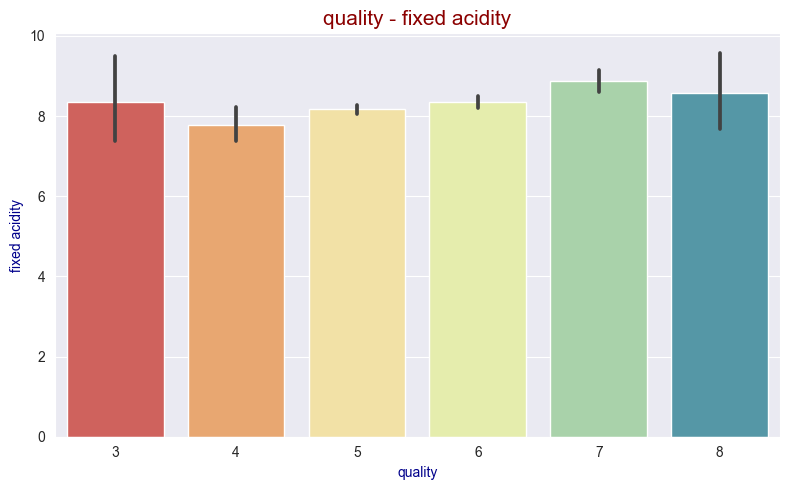

In [88]:
barplot('fixed acidity')

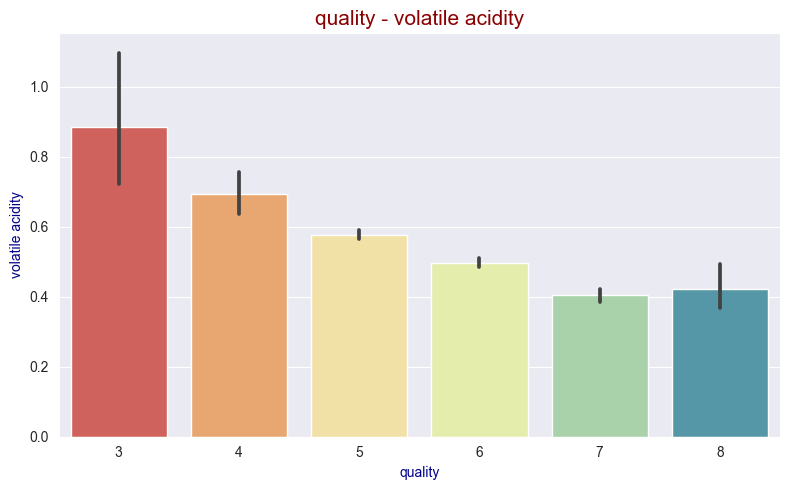

In [89]:
barplot('volatile acidity')

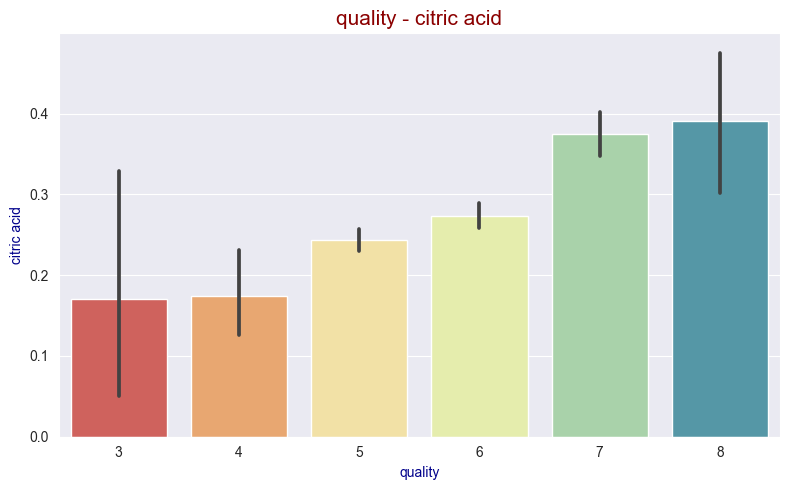

In [90]:
barplot('citric acid')

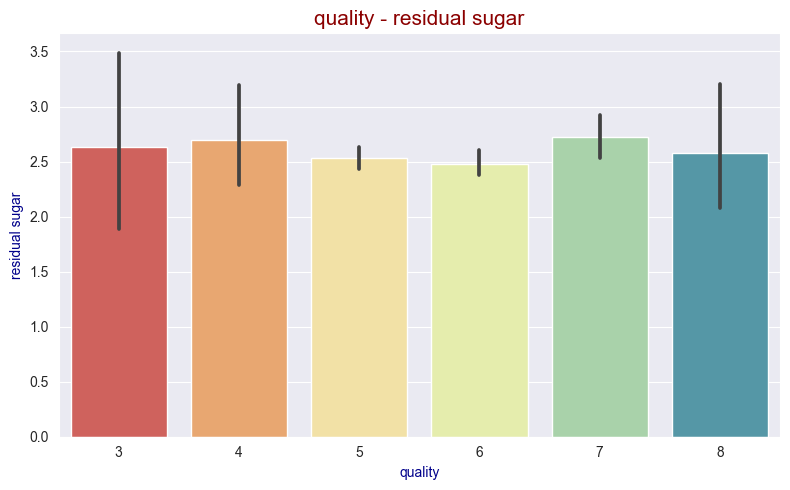

In [91]:
barplot('residual sugar')

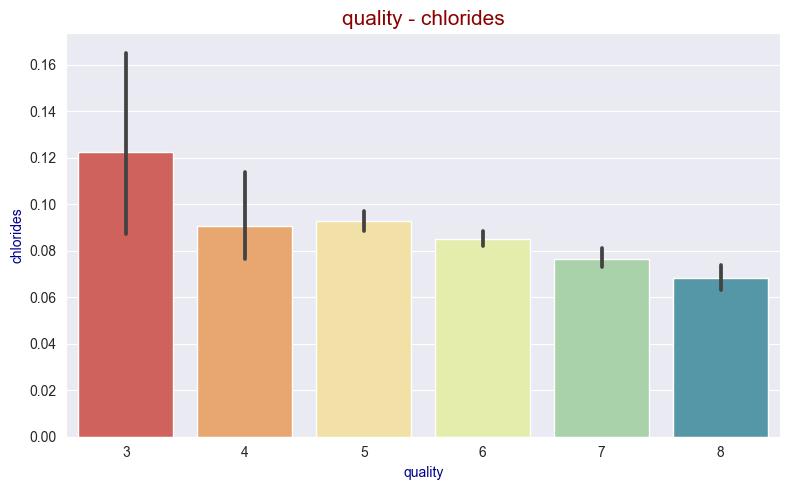

In [92]:
barplot('chlorides')

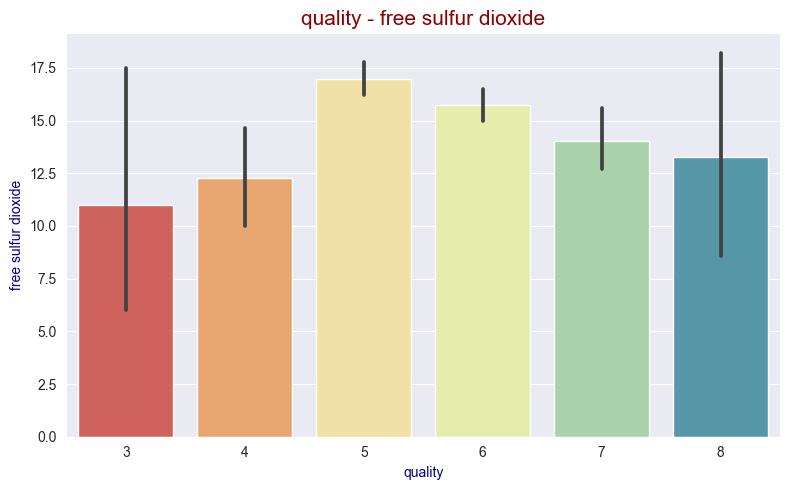

In [93]:
barplot('free sulfur dioxide')

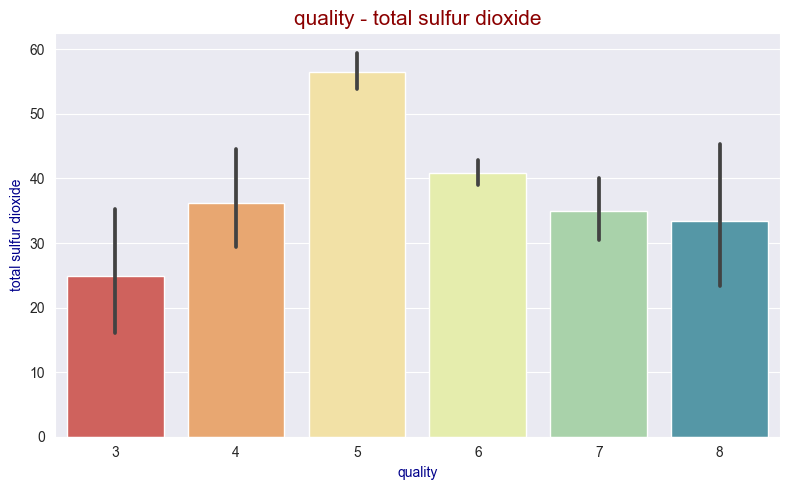

In [94]:
barplot('total sulfur dioxide')

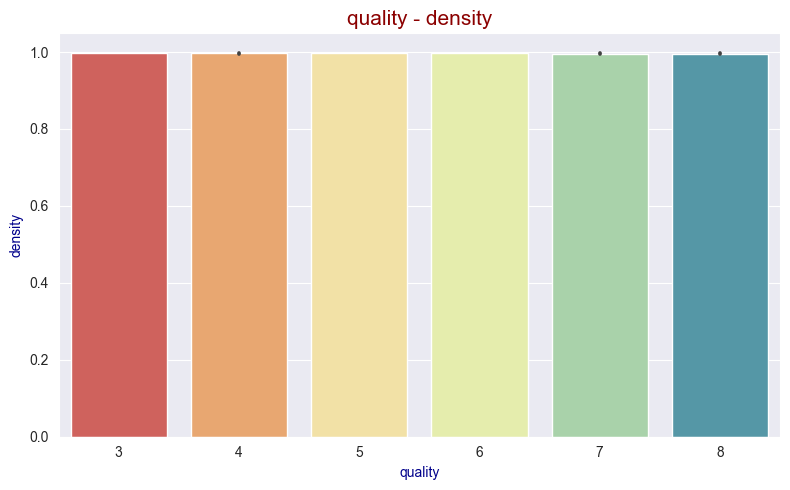

In [95]:
barplot('density')

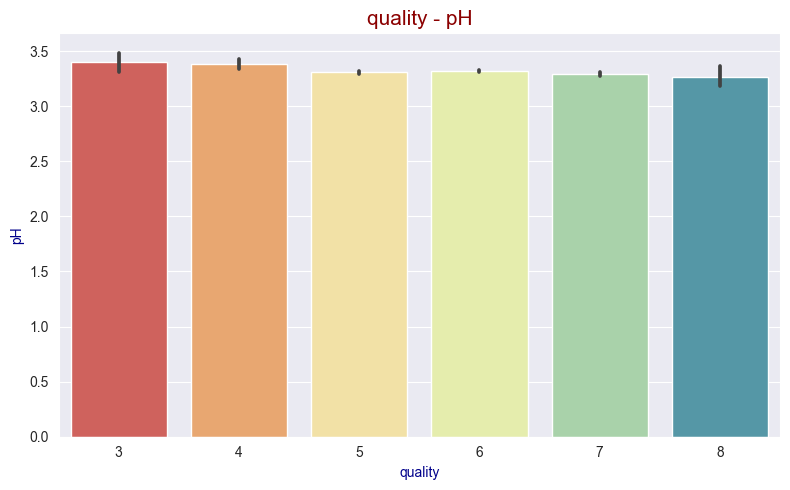

In [96]:
barplot('pH')

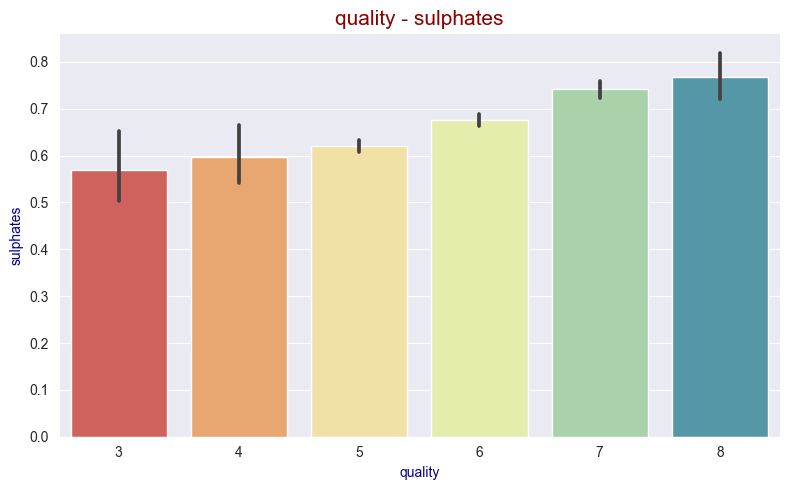

In [97]:
barplot('sulphates')

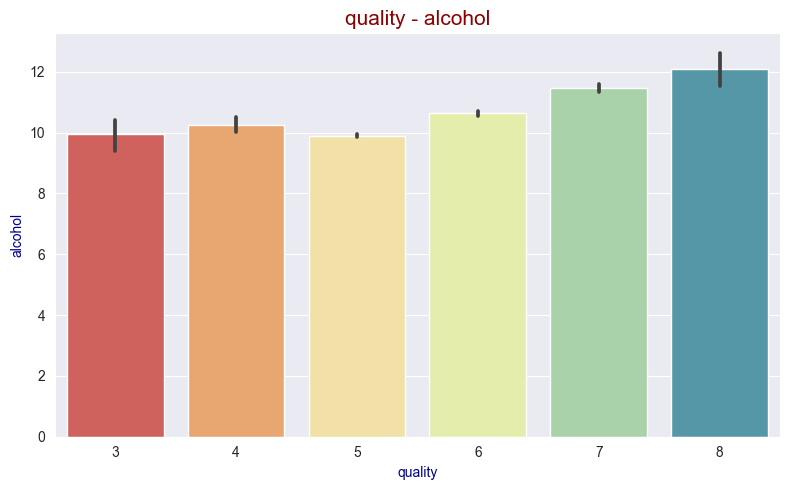

In [98]:
barplot('alcohol')

## 4.2 Variable's Distribution <a id=4.2></a>

In [99]:
def hist(col, bins='auto'):
    mean = df[col].mean()
    median = df[col].median()
    
    plt.figure(figsize=(7, 5))
    sns.histplot(df[col], bins=bins, kde=True, color='darkblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'{col}', fontdict=axis_font)
    plt.ylabel('Frequency', fontdict=axis_font)
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='--', label=f'Median: {median:.2f}')
    plt.legend()
    plt.show()

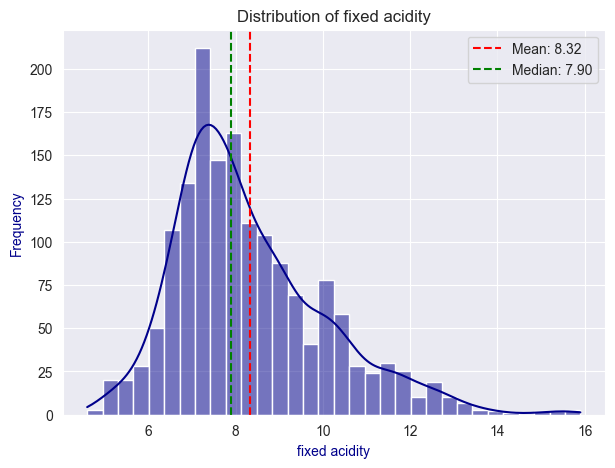

In [100]:
hist('fixed acidity')

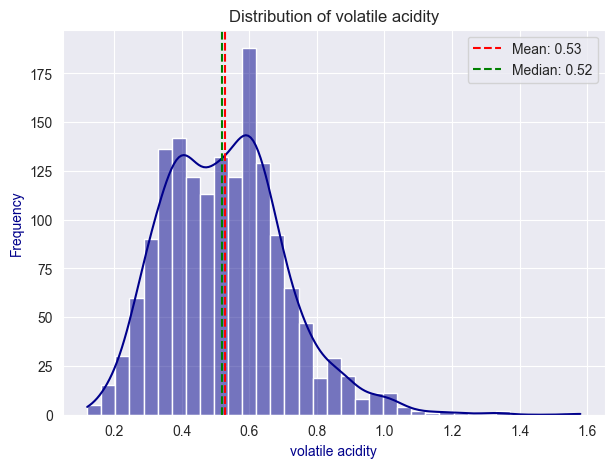

In [101]:
hist('volatile acidity')

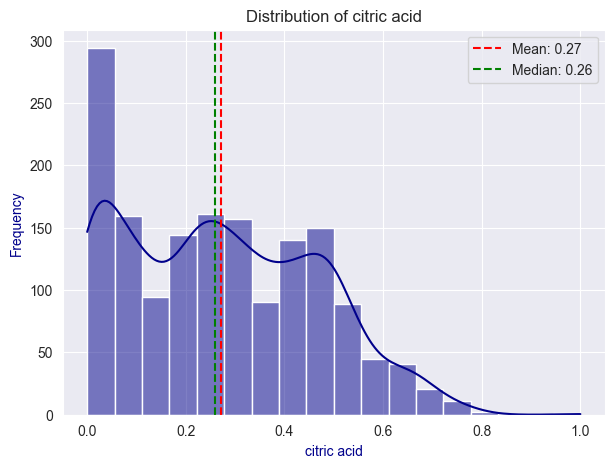

In [102]:
hist('citric acid')

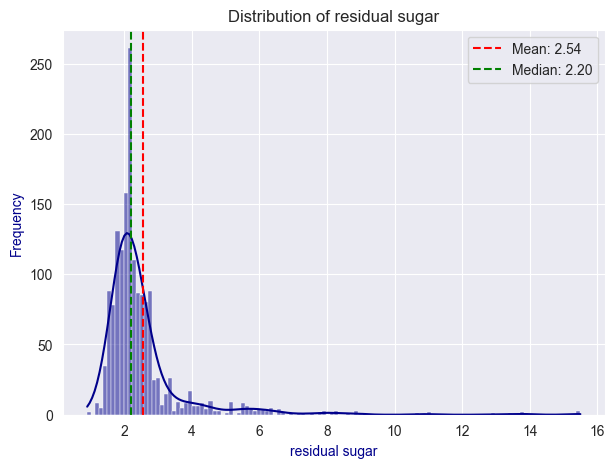

In [103]:
hist('residual sugar')

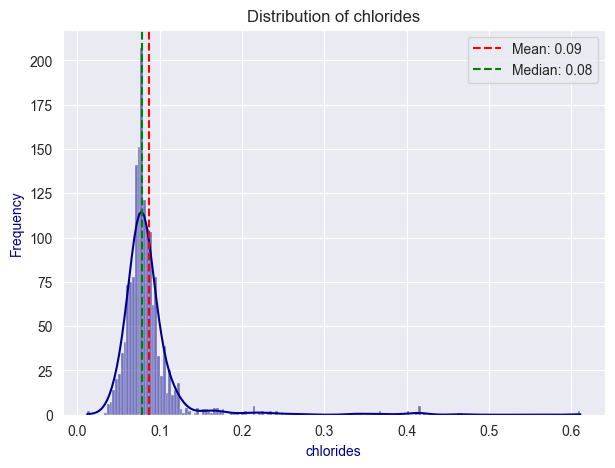

In [104]:
hist('chlorides')

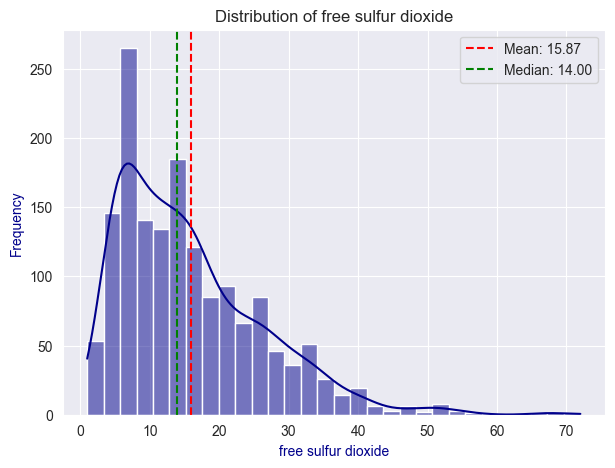

In [105]:
hist('free sulfur dioxide')

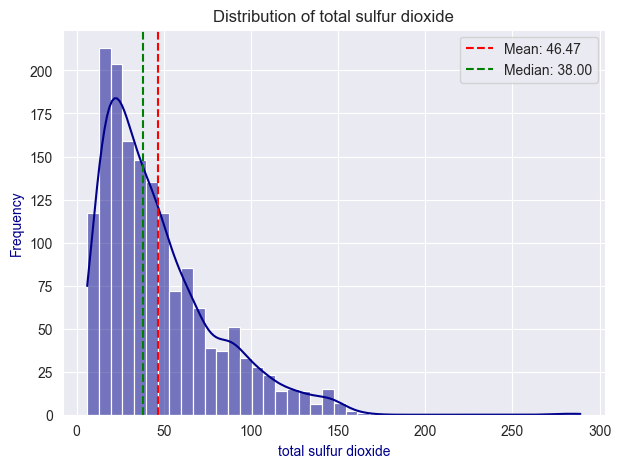

In [106]:
hist('total sulfur dioxide')

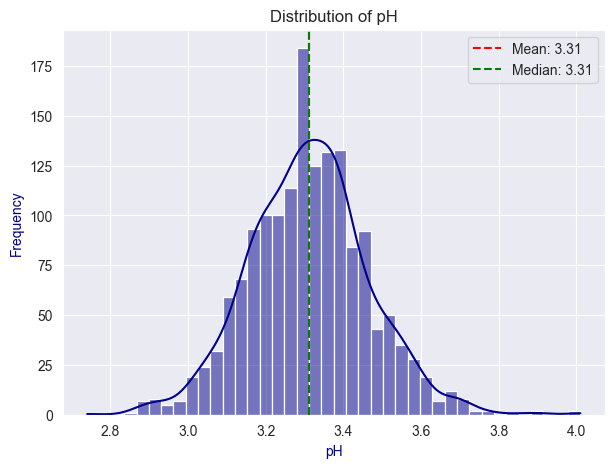

In [107]:
hist('pH')

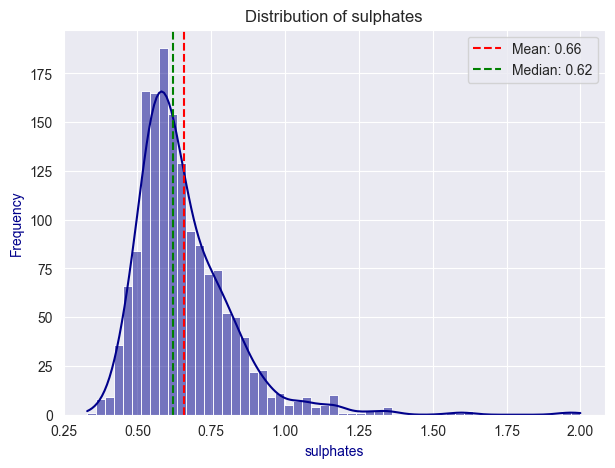

In [108]:
hist('sulphates')

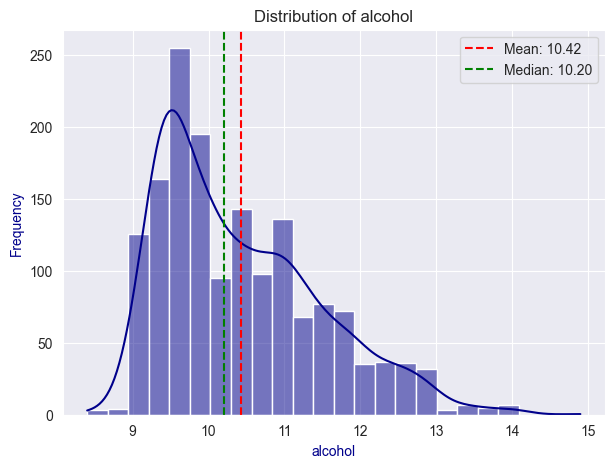

In [109]:
hist('alcohol')

### 4.2.1 Analysis Output <a id=4.2.1></a>

* Based on above histogram charts we can understand that :
  1. `pH` Variable has Normal distribution.
  2. There are minor difference between mean and median for `volatile acidity` and `chlorides`. These variables are slightly right skewed.
  3. Other variables are skewed to the right.

## 4.3 Correlation <a id=4.3></a>

<AxesSubplot:>

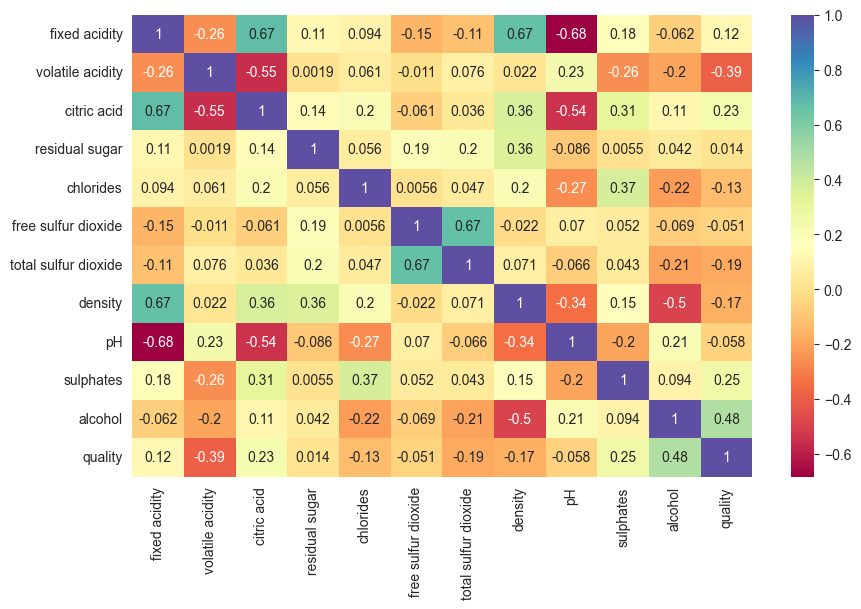

In [110]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Spectral")

### 4.3.1 Analysis Output <a id=4.3.1></a>



1. **Fixed Acidity (0.12)**:
   - There is a weak positive correlation between fixed acidity and wine quality. This suggests that wines with higher fixed acidity may slightly tend to have higher quality.

2. **Volatile Acidity (-0.39)**:
   - There is a moderate negative correlation between volatile acidity and wine quality. Higher levels of volatile acidity are associated with lower quality wines.

3. **Citric Acid (0.23)**:
   - There is a moderate positive correlation between citric acid and wine quality. Wines with higher citric acid content tend to have slightly higher quality.

4. **Residual Sugar (0.01)**:
   - There is a very weak positive correlation between residual sugar and wine quality. The correlation coefficient is close to zero, indicating almost no relationship.

5. **Chlorides (-0.13)**:
   - There is a weak negative correlation between chlorides and wine quality. Higher chloride levels are associated with slightly lower quality wines.

6. **Free Sulfur Dioxide (-0.05)**:
   - There is a very weak negative correlation between free sulfur dioxide and wine quality. The correlation coefficient is close to zero, indicating almost no relationship.

7. **Total Sulfur Dioxide (-0.19)**:
   - There is a weak negative correlation between total sulfur dioxide and wine quality. Higher total sulfur dioxide levels are associated with slightly lower quality wines.

8. **Density (-0.17)**:
   - There is a weak negative correlation between density and wine quality. Higher density wines are associated with slightly lower quality.

9. **pH (-0.06)**:
   - There is a very weak negative correlation between pH and wine quality. The correlation coefficient is close to zero, indicating almost no relationship.

10. **Sulphates (0.25)**:
    - There is a moderate positive correlation between sulphates and wine quality. Wines with higher sulphate levels tend to have slightly higher quality.

11. **Alcohol (0.48)**:
    - There is a strong positive correlation between alcohol content and wine quality. Wines with higher alcohol c
ions in wine production or selection.

# 5. Preparing For Modelling <a id=5></a>
[Go To Project Content](#0)


## 5.1 Target Variable Categorization <a id=5.1></a>

In [114]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [116]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad


## 5.2 Label Encoding <a id=5.2></a>

In [117]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['quality'] = encoder.fit_transform(df['quality'])

In [118]:
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


# 6. Modelling <a id=6></a>
[Go To Project Content](#0)


In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [122]:
X = df.drop('quality', axis = 1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## 6.1 SVC <a id=6.1></a>

In [123]:
from sklearn.svm import SVC

svc_model = SVC()

svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

In [125]:
cv_scores = cross_val_score(estimator=svc_model, X = X_train, y = y_train, cv=10)
cv_scores.mean()

0.8905511811023622

Text(0.5, 23.52222222222222, 'Predicted Label')

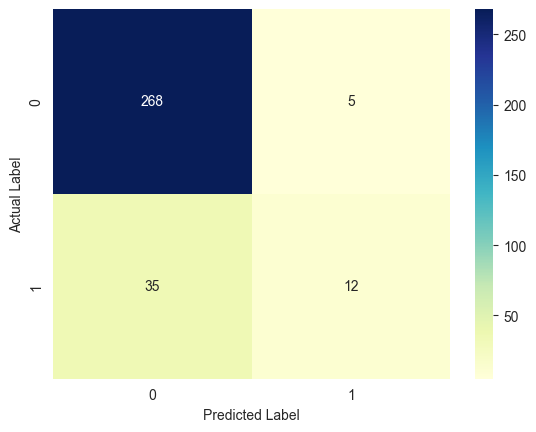

In [126]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [127]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.38        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



## 6.1.1 Hyperparameter Optimization for SVC<a id=6.1.1></a>

In [129]:
svc_model2 = SVC()

param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['poly', 'rbf']} 

grid_svc = GridSearchCV(svc_model2, param_grid=param_grid, scoring='accuracy', cv=10)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['poly', 'rbf']},
             scoring='accuracy')

In [131]:
grid_svc.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [132]:
svc_tuned = SVC(C = 1, gamma = 1, kernel = "rbf")
svc_tuned.fit(X_train, y_train)

y_pred = svc_tuned.predict(X_test)

cv_scores = cross_val_score(estimator = svc_tuned, X = X_train, y = y_train, cv=10)
cv_scores.mean()

0.9038385826771653

Text(0.5, 23.52222222222222, 'Predicted Label')

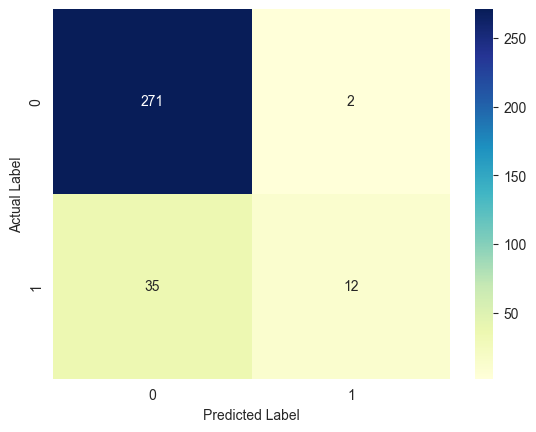

In [133]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [134]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       273
           1       0.86      0.26      0.39        47

    accuracy                           0.88       320
   macro avg       0.87      0.62      0.66       320
weighted avg       0.88      0.88      0.86       320



## 6.2 RandomForest <a id=6.2></a>

In [135]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)
# Prediction
y_pred = rf.predict(X_test)

Text(0.5, 23.52222222222222, 'Predicted Label')

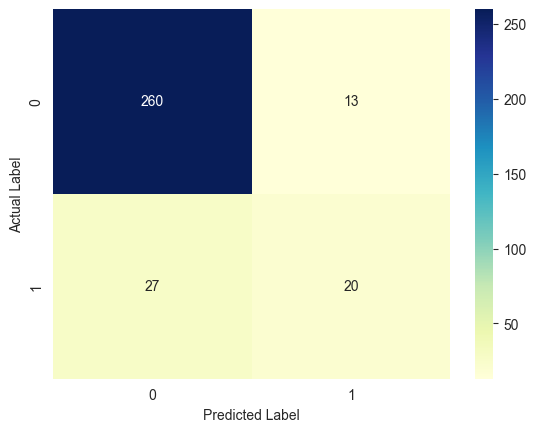

In [138]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [137]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       273
           1       0.61      0.43      0.50        47

    accuracy                           0.88       320
   macro avg       0.76      0.69      0.71       320
weighted avg       0.86      0.88      0.87       320



## 6.2.1 Corss Validation Score for RandomForest <a id=6.2.1></a>

In [144]:
rf_cv = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
rf_cv.mean()

0.9116633858267716